In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/child-labour-in-inida/Child Labour in India.csv
/kaggle/input/child-labour-in-inida/incidence-of-child-labour.csv
/kaggle/input/child-labour-in-inida/Indian_States.shp
/kaggle/input/child-labour-in-inida/Indian_States.prj
/kaggle/input/child-labour-in-inida/Indian_States.shx
/kaggle/input/child-labour-in-inida/Indian_States.dbf


**The Issue**

Child Labour is a major issue in India. The root of the problem lies in inequal wealth distribution between different classes of the country's citizens. India has been able to lift a significant percentage of it's population out of poverty but despite all the efforts more than 20% of its population still live in extreme poverty. When a family is living in extreme poverty, when all members of the family need to work to just to make the ends meet, children working for wages seems like a non issue to its members. They can't afford to realise that they are striping away their children's shot at a better life by not letting them have an education. This vicious cycle of poverty will continue for generations until the familes stop sending their children to work.

**About data**

Sectorail distribution of child labour in India. It has 9 columns and has 21 rows. 20 rows for different states of India and the last row is an All India distribution. The first two columns of the data give us an about the various states and the categories they belong to namely 'Non Special Category' and 'Special Category'. The rest of the columns are various sectors where child labour is prevalant. This data has to be read row wise meaning, take a state and read through the data from different columns in it's row to understand the prevalancy of child labour in different sectors for that particalular state.



**Exploratory data analysis**

In [2]:
df = pd.read_csv('/kaggle/input/child-labour-in-inida/Child Labour in India.csv')

In [3]:
df.head()

,Category of States,States,Agriculture,Manufacturing,Construction,Trade Hotels & Restaurants,"Community, Social and Personal Services",Others,Total
0,Non Special Category states,Andhra Pradesh,69.0,9.7,3.2,9.0,7.1,2.0,100
1,Non Special Category states,Assam,69.3,8.4,1.8,7.8,11.0,1.8,100
2,Non Special Category states,Bihar,71.8,11.2,0.0,15.5,1.1,0.5,100
3,Non Special Category states,Chhattisgarh,87.9,2.4,0.9,7.2,1.7,0.0,100
4,Non Special Category states,Delhi,0.0,11.1,0.0,57.8,31.1,0.0,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
Category of States                         21 non-null object
States                                     21 non-null object
Agriculture                                21 non-null float64
Manufacturing                              21 non-null object
Construction                               21 non-null float64
Trade Hotels & Restaurants                 21 non-null float64
Community, Social and Personal Services    21 non-null float64
Others                                     21 non-null float64
Total                                      21 non-null int64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.6+ KB


In [5]:
print('The number of rows are {}' '\n' 'The number of columns are {}'.format(df.shape[0], df.shape[1]) )

The number of rows are 21
The number of columns are 9


In [6]:
df.drop('Total', axis = 1, inplace = True)

In [7]:
All_india = df[df['States'] == 'All India']
All_india

,Category of States,States,Agriculture,Manufacturing,Construction,Trade Hotels & Restaurants,"Community, Social and Personal Services",Others
20,All India,All India,68.1,16.6,2.0,8.5,3.4,1.5


In [8]:
df.drop(20, axis = 0, inplace = True)

In [9]:
df.columns = ['Hospitality' if 'Restaurants' in col_name else 'Services' if 'Services' in col_name else col_name for col_name in df.columns]

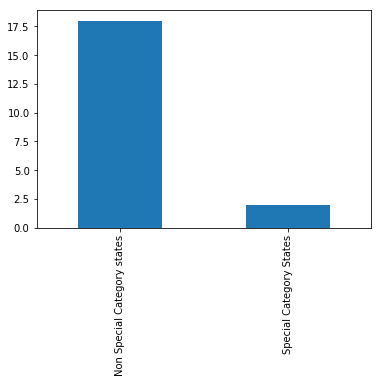

In [10]:
df['Category of States'].value_counts().plot(kind = 'bar')

In [11]:
df['States'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi',
       'Gujarat', 'Haryana', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Orissa', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Uttar Pradesh', 'West Bengal', 'Himachal Pradesh',
       'Uttarakhand'], dtype=object)

In [12]:
df['States'].nunique()

20

In [13]:
df['Manufacturing'] = [9.9 if x == '9. 9' else float(x) for x in df['Manufacturing']]

In [14]:
num_cols = np.array([col for col in df.columns if df[col].dtype == 'float64'])

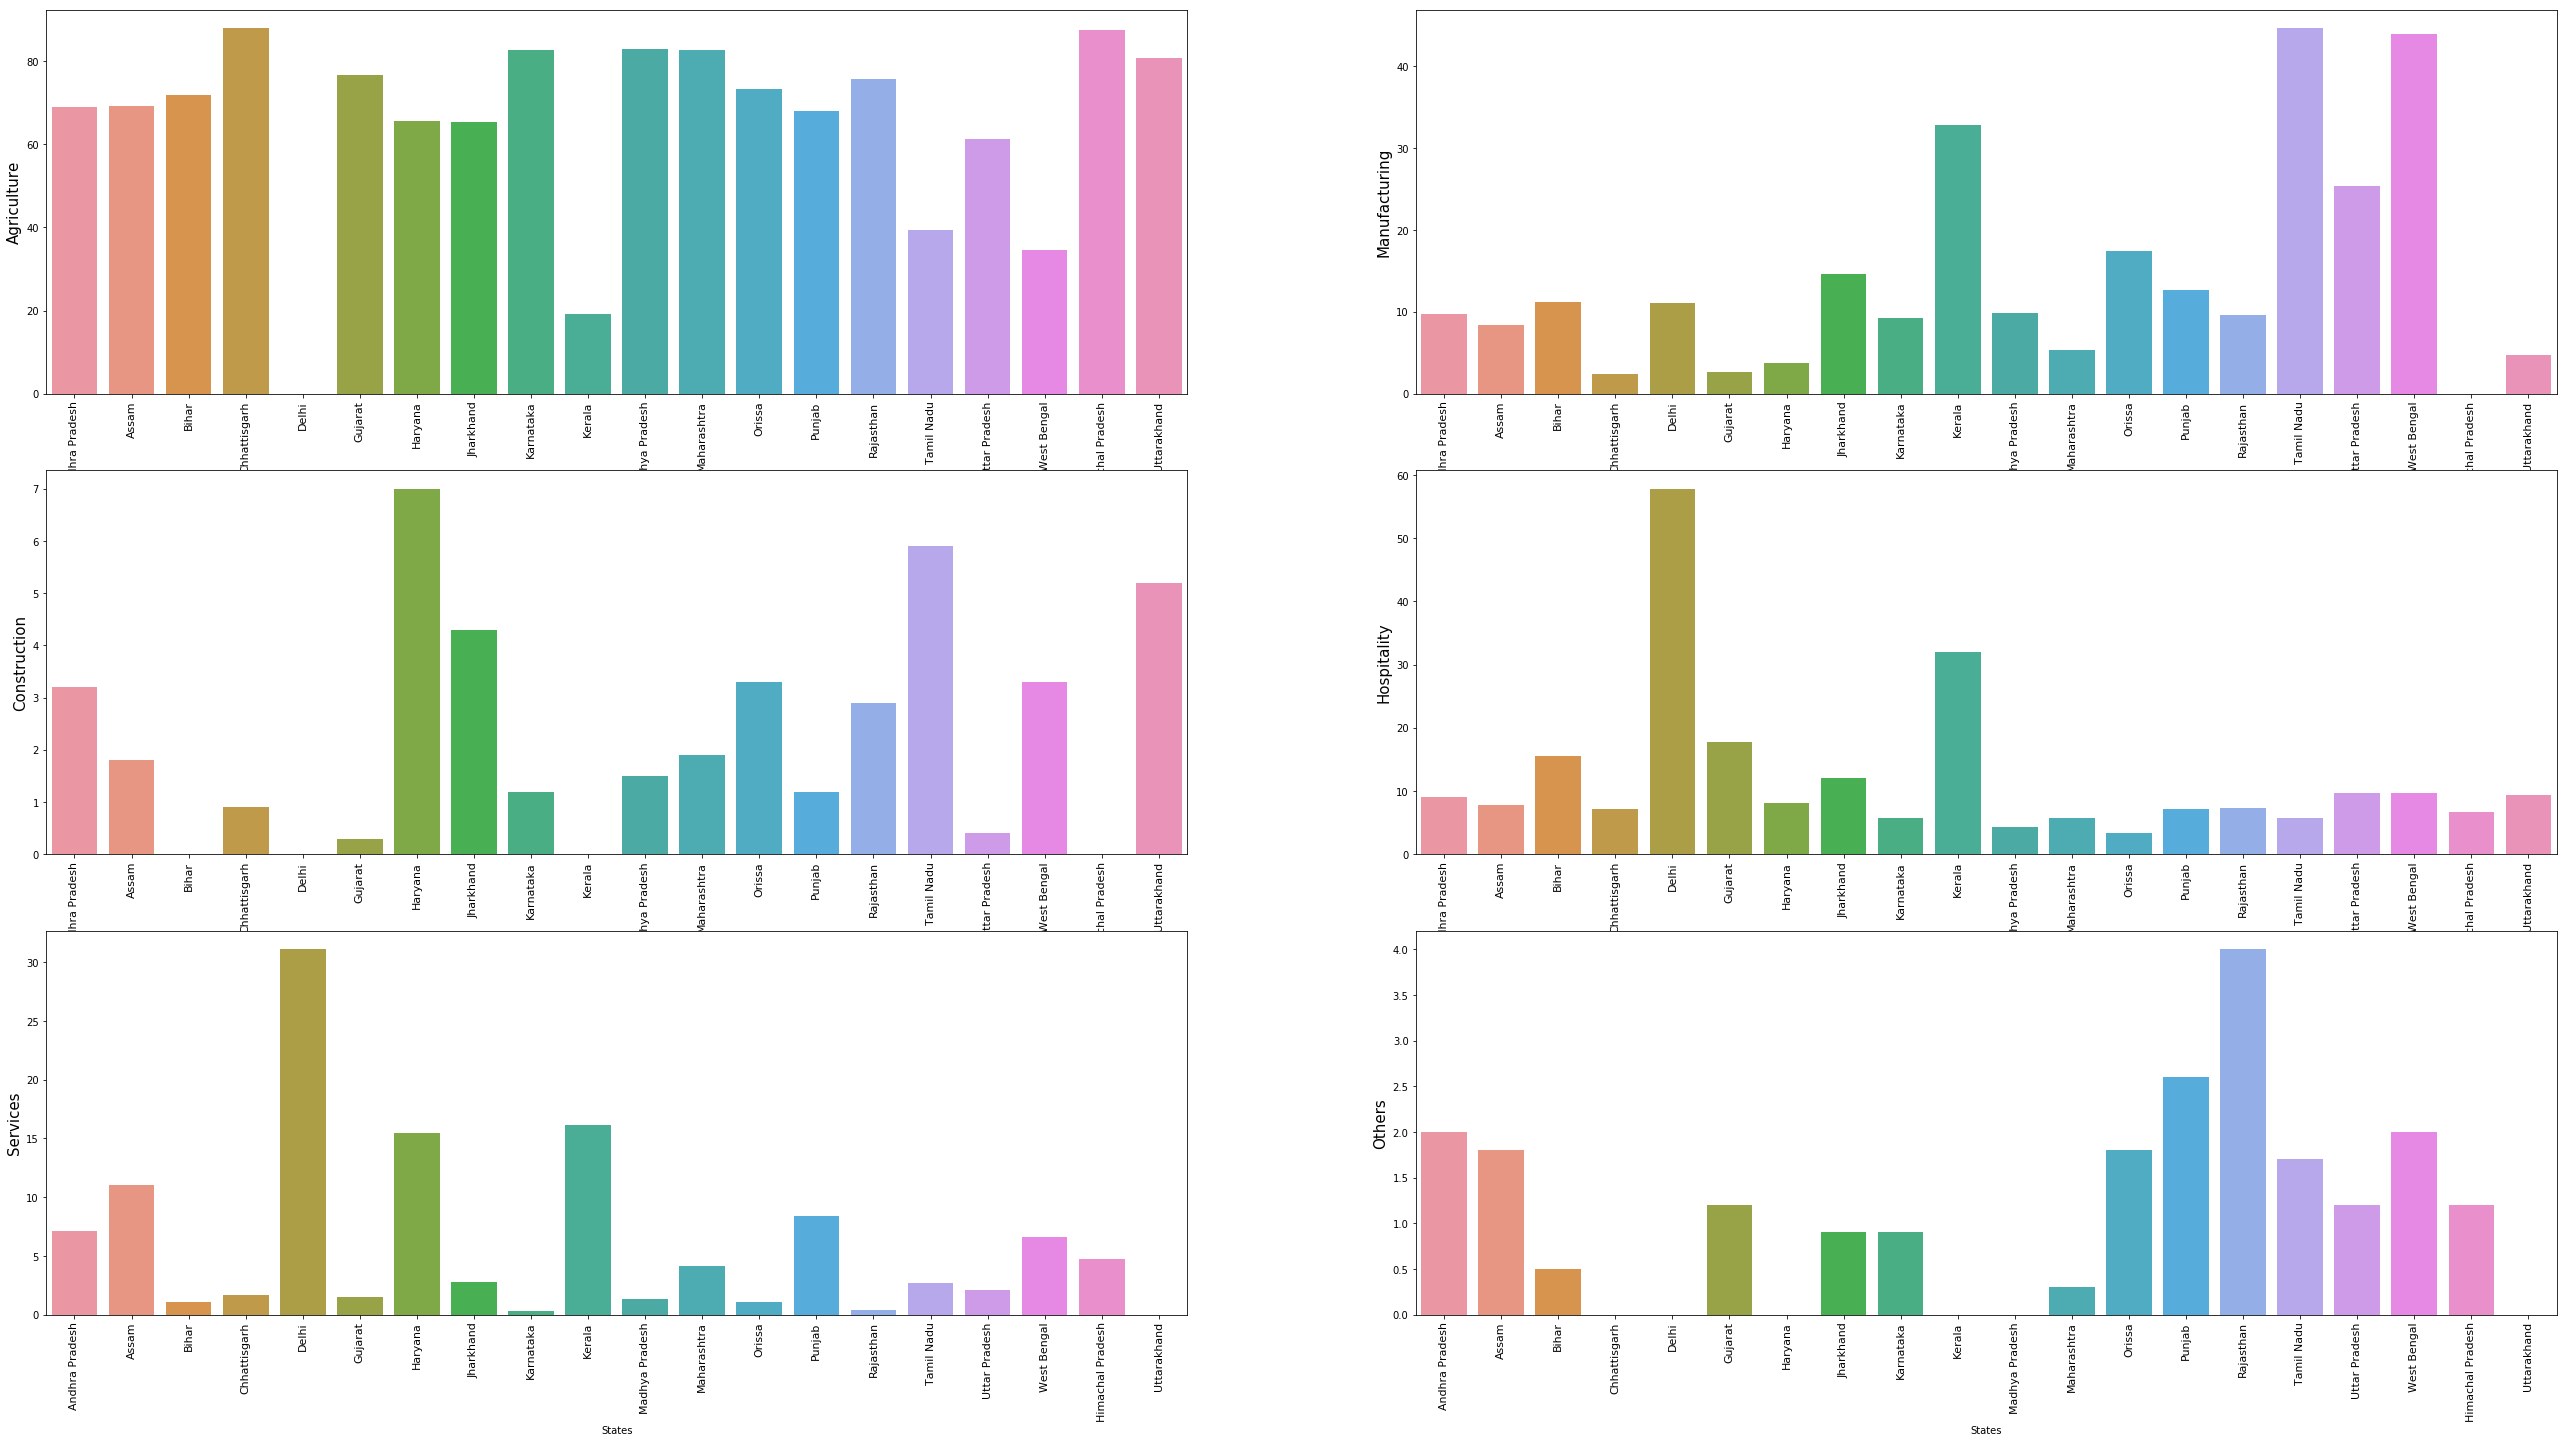

In [15]:
fig, ax = plt.subplots(3,2, figsize = (45, 24))
for x in range(3):
    for y in range(2):
        sns.barplot(x = 'States', y = num_cols.reshape(3,2)[x][y], data = df, ax = ax[x][y])
        plt.setp(ax[x][y].get_xticklabels(), rotation = 'vertical', fontsize=11)
        ax[x][y].set_ylabel(num_cols.reshape(3, 2)[x][y], fontsize = 15)

In [16]:
States = df['States'].values.reshape(4,5)

In [17]:
df.tail()

,Category of States,States,Agriculture,Manufacturing,Construction,Hospitality,Services,Others
15,Non Special Category states,Tamil Nadu,39.5,44.6,5.9,5.7,2.7,1.7
16,Non Special Category states,Uttar Pradesh,61.2,25.3,0.4,9.7,2.1,1.2
17,Non Special Category states,West Bengal,34.6,43.9,3.3,9.7,6.6,2.0
18,Special Category States,Himachal Pradesh,87.4,0.0,0.0,6.7,4.7,1.2
19,Special Category States,Uttarakhand,80.7,4.7,5.2,9.3,0.0,0.0


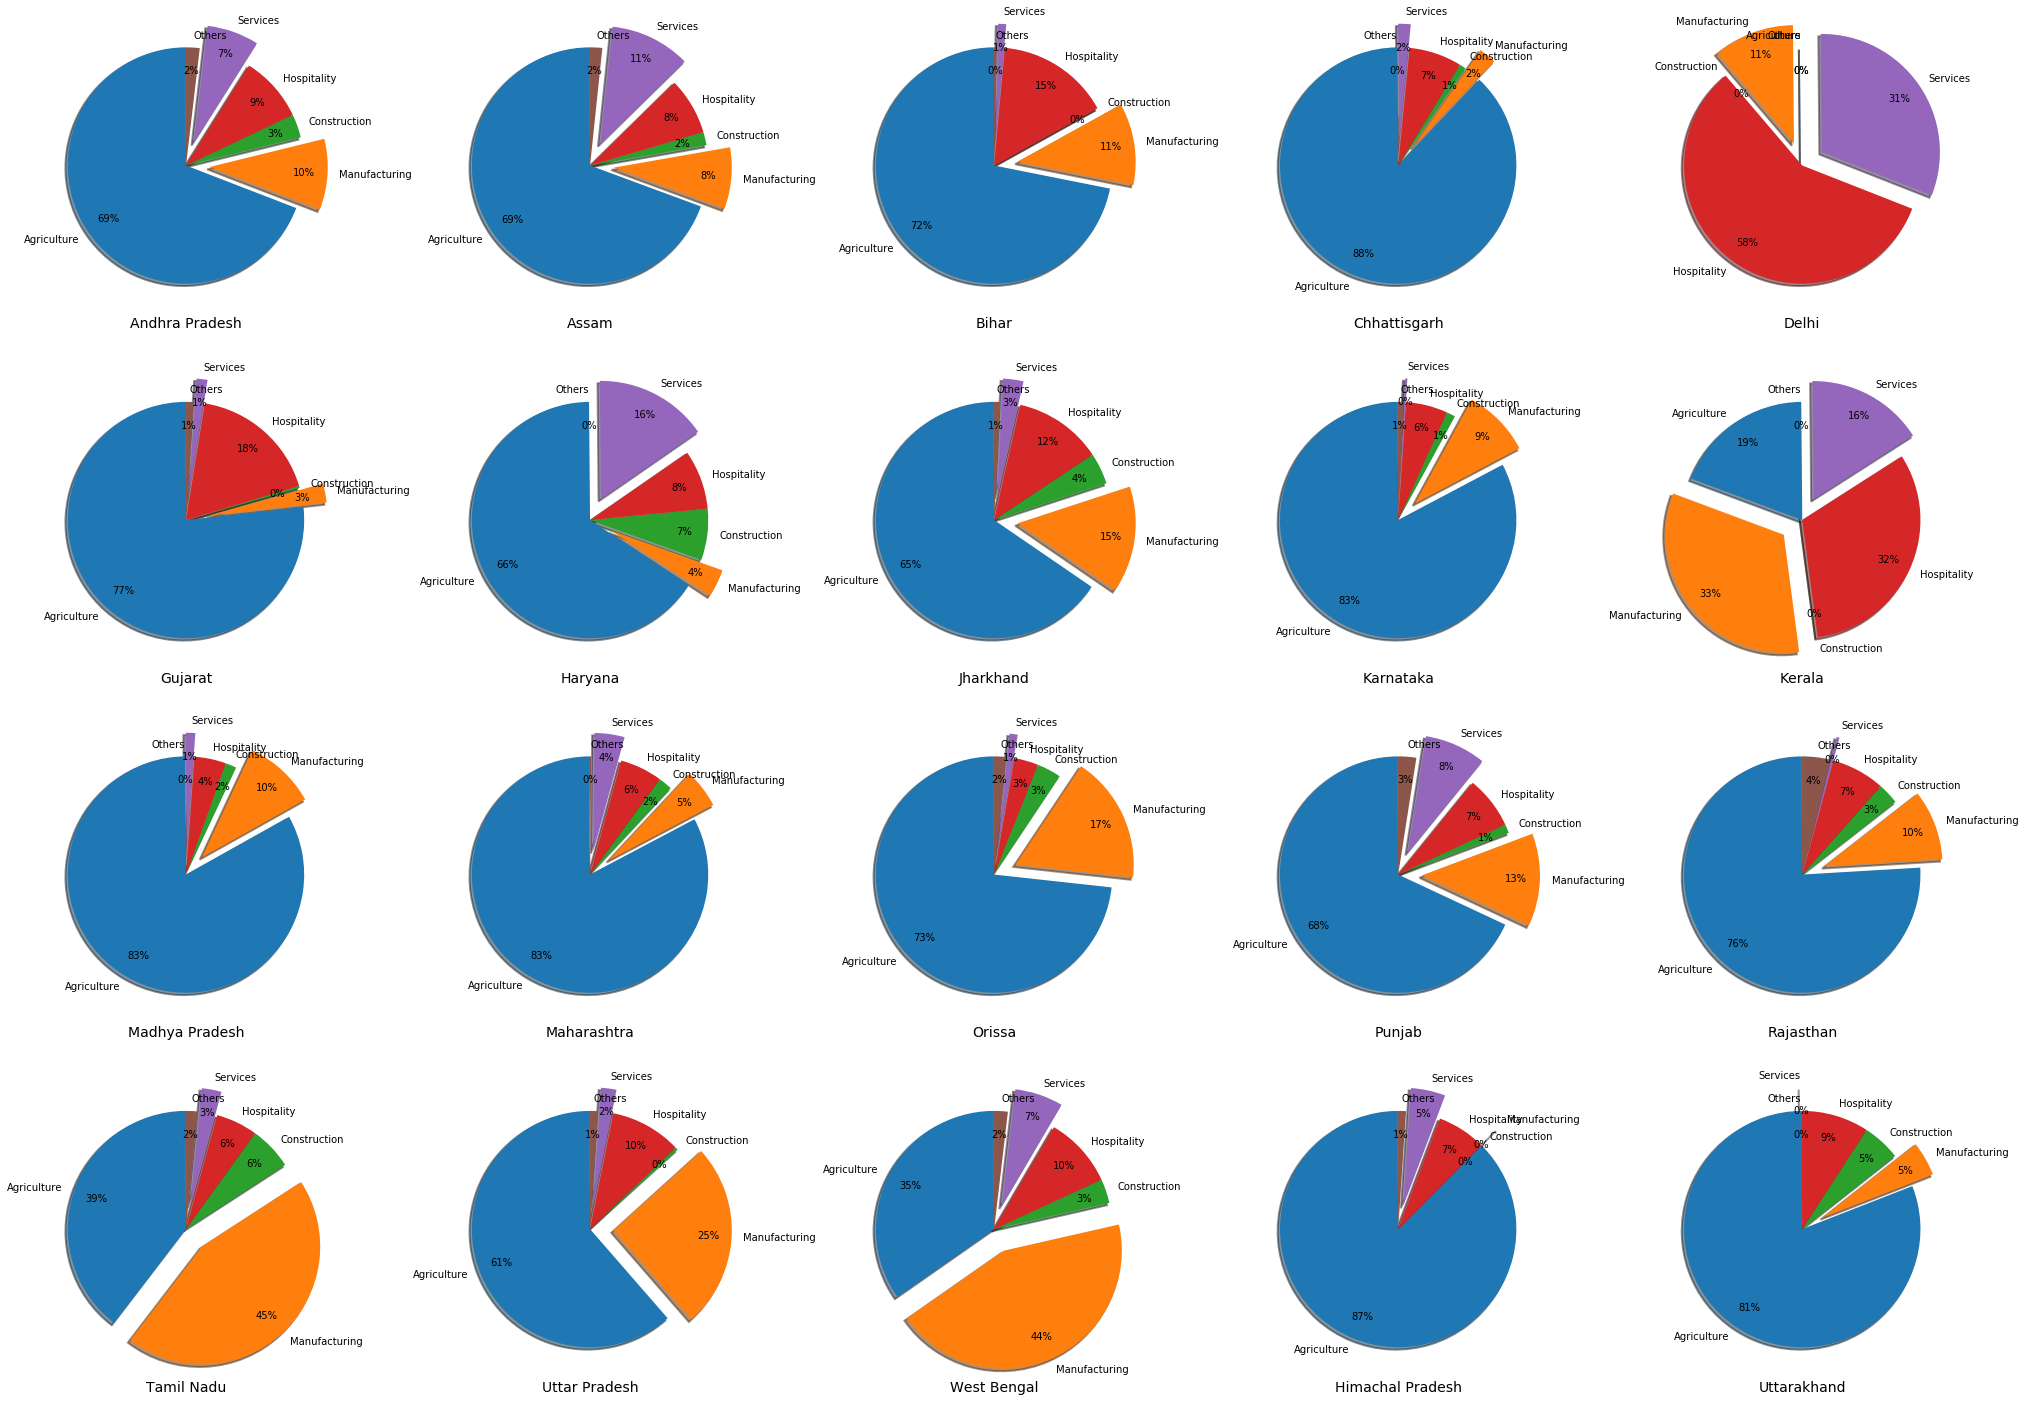

In [18]:
fig, ax = plt.subplots(4, 5, figsize = (35, 25))
explode = [0, 0.2, 0, 0, 0.2, 0]
for x in range(States.shape[0]):
    for y in range(States.shape[1]):
        ax[x][y].pie(x = df[df['States'] == States[x][y]][num_cols].values.tolist()[0] , labels = df[df['States'] == States[x][y]][num_cols].columns
                     , explode=explode, autopct ='%.0f%%', wedgeprops = {'linewidth': 2.0}, pctdistance = 0.8, shadow = True, startangle = 90.5)
        ax[x][y].set_xlabel(States.reshape(4,5)[x][y], fontsize = 14)
        fig.show()

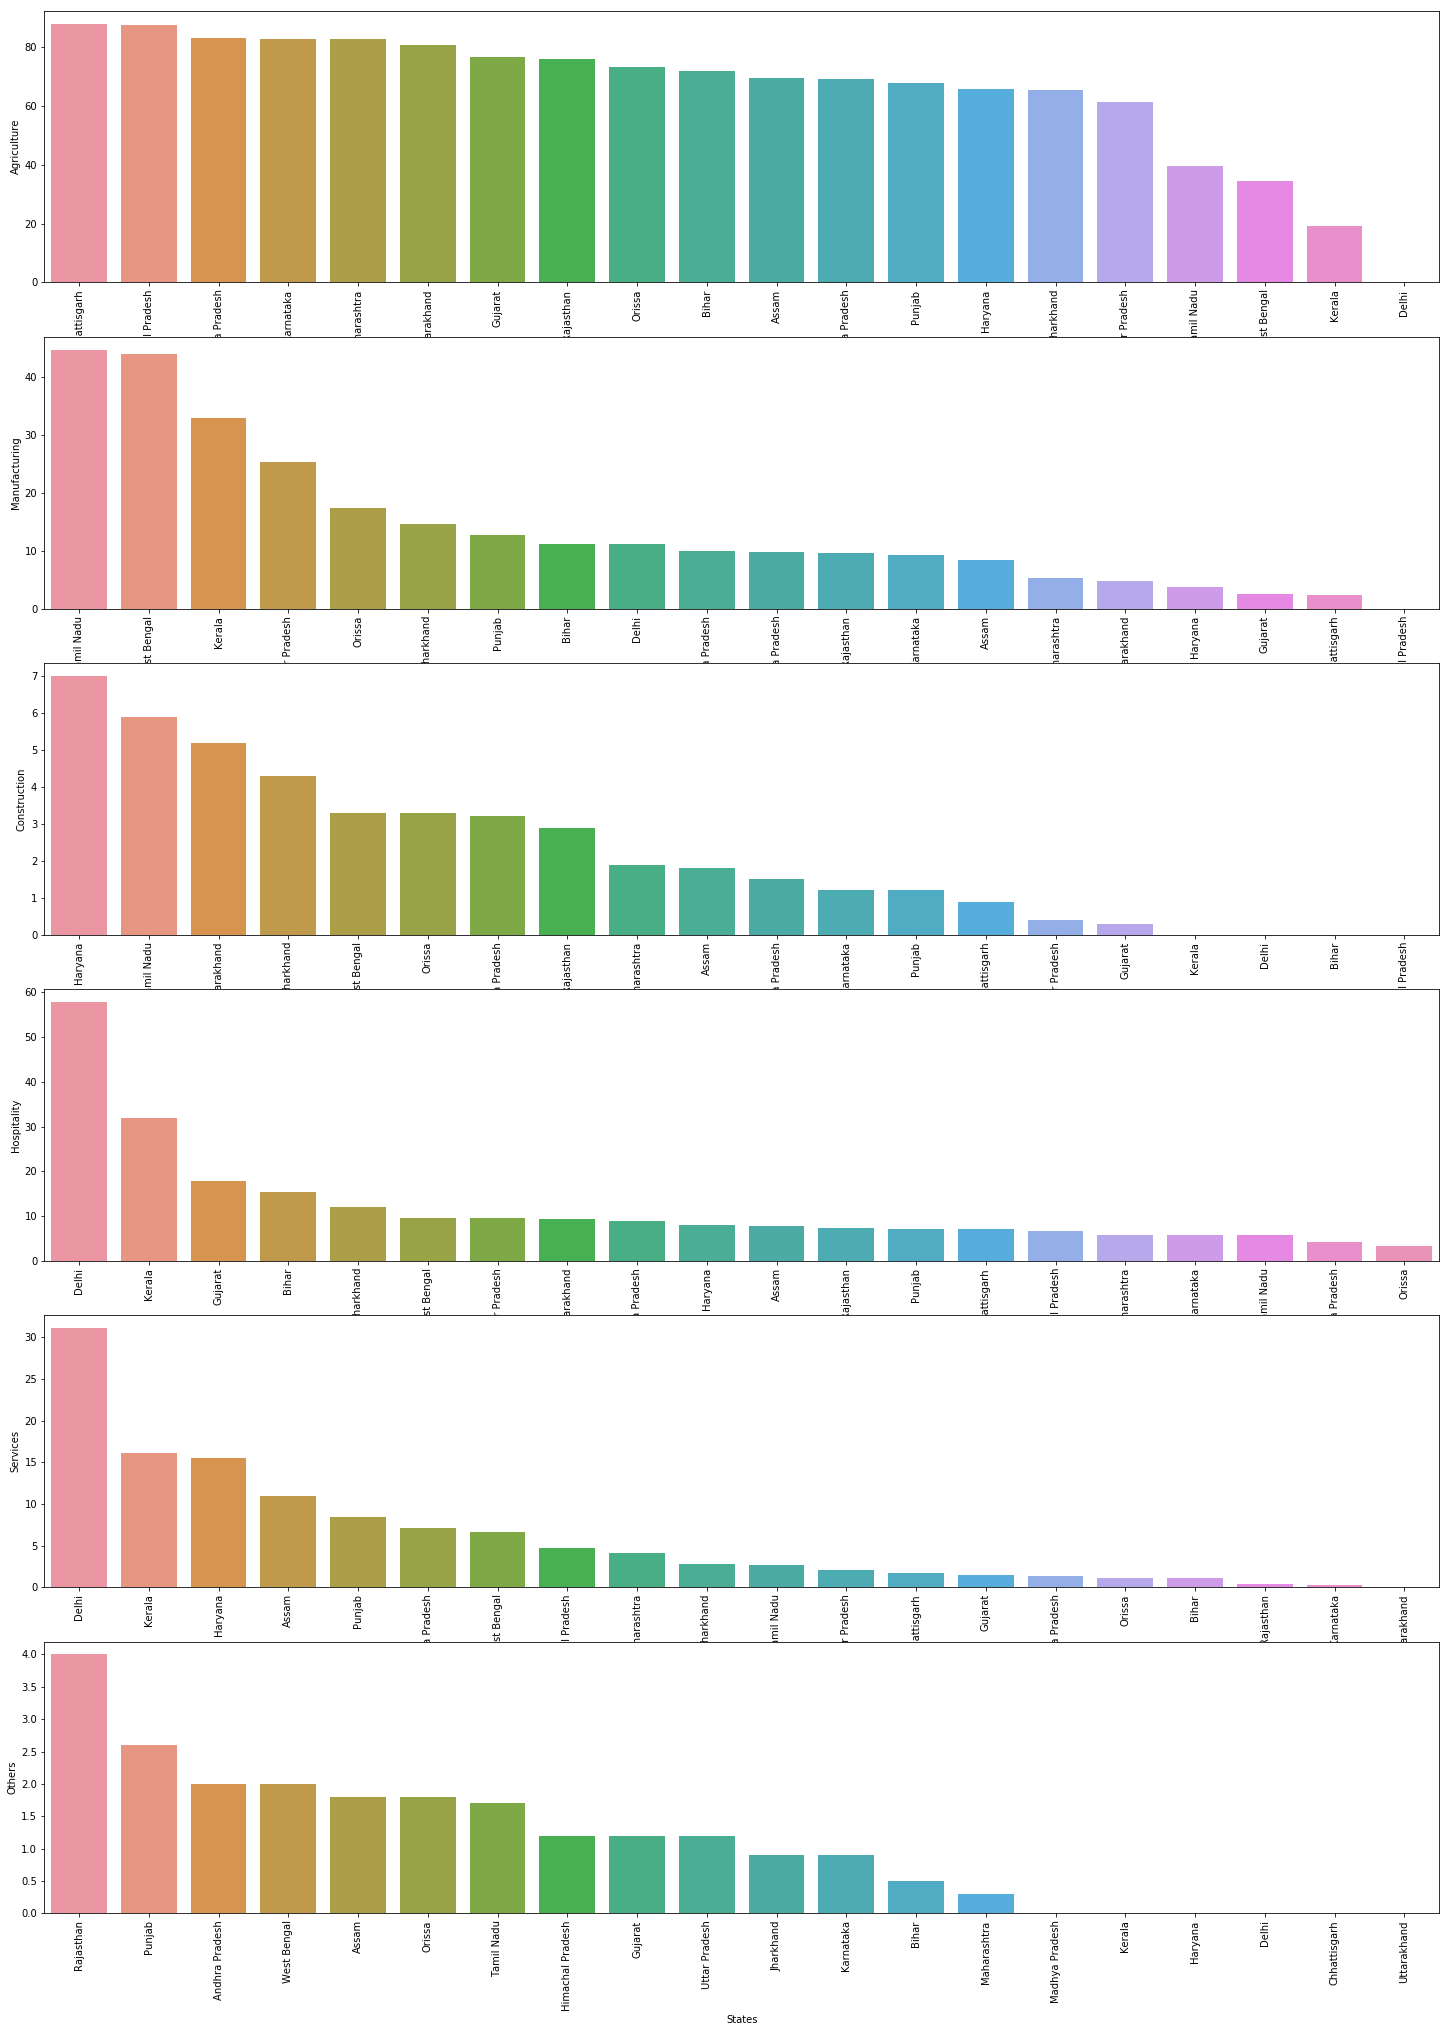

In [19]:
fig, ax = plt.subplots(nrows = len(num_cols), figsize = (25, 35))
for col in range(len(num_cols)):
    dat = df.sort_values(by = num_cols[col], ascending = False)
    sns.barplot(x = 'States', y = num_cols[col], data = dat, ax = ax[col])
    plt.setp(ax[col].get_xticklabels(), rotation = 'vertical')

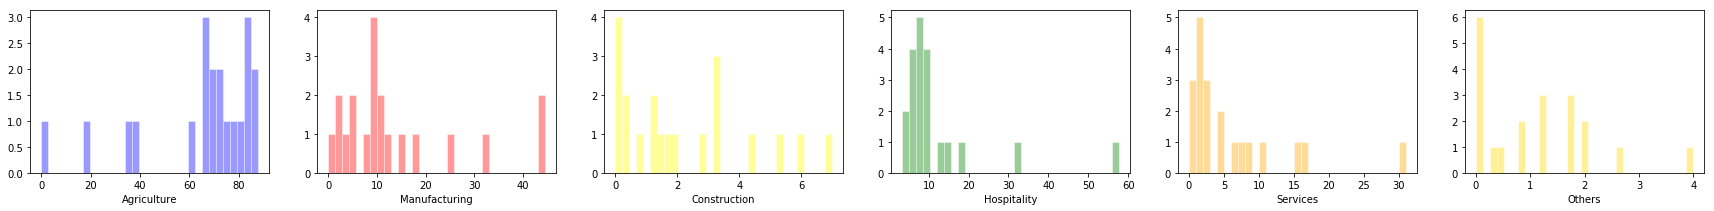

In [20]:
fig, ax = plt.subplots(ncols = len(num_cols), figsize = (30, 3))
sns.set_style('darkgrid')
colors = ['blue', 'red', 'yellow', 'green', 'orange', 'gold']
for col in range(len(num_cols)):
    sns.distplot(df[num_cols[col]], ax = ax[col], color = colors[col], kde = False, bins = 31)

In [21]:
df.head()

,Category of States,States,Agriculture,Manufacturing,Construction,Hospitality,Services,Others
0,Non Special Category states,Andhra Pradesh,69.0,9.7,3.2,9.0,7.1,2.0
1,Non Special Category states,Assam,69.3,8.4,1.8,7.8,11.0,1.8
2,Non Special Category states,Bihar,71.8,11.2,0.0,15.5,1.1,0.5
3,Non Special Category states,Chhattisgarh,87.9,2.4,0.9,7.2,1.7,0.0
4,Non Special Category states,Delhi,0.0,11.1,0.0,57.8,31.1,0.0


In [22]:
Mean_of_all = [round(df[x].mean()) for x in num_cols]

In [23]:
Mean_of_all_df = pd.DataFrame(Mean_of_all, index=num_cols)

Text(0.5, 1.0, 'Mean of Child Labour in various sectors across all states')

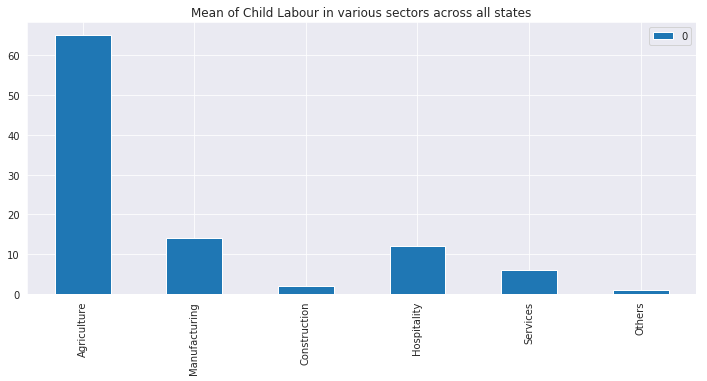

In [24]:
Mean_of_all_df.plot.bar(figsize = (12, 5))
plt.title("Mean of Child Labour in various sectors across all states")

This Kernel is a work in progress I will continue to imporve it with time. Any suggestions or criticisim will be appricated.

Music I listened to:

Coast Modern Album - Coast Modern